In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shark_data_unclean = pd.read_csv('data/Alex_Kinda_clean_data.csv', encoding = "ISO-8859-1")

In [18]:
shark_data_unclean = shark_data_unclean.drop("Unnamed: 0" , 1)
shark_data_unclean['Age'] = pd.to_numeric(shark_data_unclean['Age'], errors='coerce')
shark_data_unclean['Time'] = pd.to_numeric(shark_data_unclean['Time'], errors='coerce')
shark_data_unclean = shark_data_unclean.dropna(subset=["Activity"])

C:\Users\joshu\AppData\Local\Temp/ipykernel_19184/394909267.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  shark_data_unclean = shark_data_unclean.drop("Unnamed: 0" , 1)


In [19]:
shark_data_unclean.value_counts("Type")

Type
Unprovoked    3696
Provoked       440
dtype: int64

In [20]:
shark_data_unclean = shark_data_unclean[shark_data_unclean["Activity"] != "nan"]

In [21]:
shark_data_unclean

,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
0,Unprovoked,surfing,M,6,Minor injury to right arm,N,1320.0,Not Determined,20210909,"USA Florida Ponce Inlet, Volusia County",29.096373,-80.936998,26.100000,1.000000,16.200000,1012.500000
1,Unprovoked,surfing,M,31,FATAL,Y,1030.0,White xhark,20210905,AUSTRALIA New South Wales Emerald Beach,-30.157479,153.150195,13.600000,4.600000,20.400000,1017.300000
2,Unprovoked,boarding,M,27,Lacerations both sides of lower leg immediatel...,N,1145.0,Not Determined,20210828,"USA Texas Galveston Island, Galveston County",29.241005,-94.909133,29.400000,2.500000,10.400000,1013.700000
3,Unprovoked,fell,M,64,Severe injury to leg,N,1400.0,Not Determined,20210903,USA Louisiana off Grand Isle,29.236617,-89.987294,27.200000,3.900000,5.100000,1014.600000
4,Unprovoked,surfing,M,41,Left ankle and foot bitten,N,640.0,Bull shark,20210821,"USA Florida Walton Beach Psrk, St. Lucie County",27.337890,-80.233431,28.900000,0.200000,11.000000,1015.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,Unprovoked,floating,M,27,"Bathing suit torn & ""imprints of the shark's t...",N,1800.0,Not Determined,19000905,"USA Hawaii Waikiki Beach, Oahu",21.279346,-157.829185,24.041156,9.165706,12.665634,1016.229106
4132,Unprovoked,bathing,M,27,Left hand lacerated,N,1800.0,Not Determined,19000821,"USA North Carolina Southport, Brunswick County",33.918209,-78.019301,24.041156,9.165706,12.665634,1016.229106
4133,Unprovoked,swimming,M,27,FATAL,Y,9999.0,Not Determined,19000731,"CROATIA Primorje-Gorski Kotar County Volosko,...",45.350000,14.316667,24.041156,9.165706,12.665634,1016.229106
4134,Provoked,0,Not Determined,27,"No injury to occupants. They shot shark, then ...",N,9999.0,Not Determined,19875253,"USA Connecticut Bridgeport, Fairfield County",41.179226,-73.189438,24.041156,9.165706,12.665634,1016.229106


In [22]:
activity_df = shark_data_unclean.value_counts("Activity").reset_index()

In [23]:
activity_df = activity_df.iloc[:, 0]
activity_list = activity_df.values.tolist()

In [24]:
activity_dict = {}
index = 0
for item in activity_list:
    activity_dict[item] = index
    index += 1

In [25]:
cur_index = 0
for activity in shark_data_unclean["Activity"]:
    if activity in activity_dict:
        shark_data_unclean.iloc[cur_index, 3] = activity_dict[activity]
        cur_index += 1
    else:
        print(activity, " : ", index)
        shark_data_unclean = shark_data_unclean.drop(index=cur_index)

In [26]:
#shark_data_unclean["Activity"]
#shark_data_unclean['code'] = shark_data_unclean.cc.cat.codes

In [27]:
shark_data_unclean.columns

Index(['Type', 'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Proper_date', 'Full Location', 'latitude', 'longitude',
       'avg_temp', 'precipitation', 'wind_speed', 'sea_level_pressure'],
      dtype='object')

In [28]:
#shark_data_unclean = shark_data_unclean[["Type", "Activity", "Fatal (Y/N)", "Sex "]]
shark_data_unclean = shark_data_unclean.dropna()

shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Unprovoked", '0')
shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Provoked", '1')

shark_data_unclean['Activity'] = pd.factorize(shark_data_unclean['Activity'])[0] 
shark_data_unclean['Fatal (Y/N)'] = pd.factorize(shark_data_unclean['Fatal (Y/N)'])[0] 
shark_data_unclean['Sex '] = pd.factorize(shark_data_unclean['Sex '])[0] 
shark_data_unclean['Injury'] = pd.factorize(shark_data_unclean['Injury'])[0] 
shark_data_unclean['Species '] = pd.factorize(shark_data_unclean['Species '])[0] 
shark_data_unclean['Full Location'] = pd.factorize(shark_data_unclean['Full Location'])[0] 

#shark_data_unclean['wind_speed'] = pd.factorize(shark_data_unclean['wind_speed'])[0] 

#shark_data_unclean['Time'] = pd.factorize(shark_data_unclean['Time'])[0] 
#shark_data_unclean['Age'] = pd.factorize(shark_data_unclean['Age'])[0] 
#shark_data_unclean['sea_level_pressure'] = pd.factorize(shark_data_unclean['sea_level_pressure'])[0] 

shark_data_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4135
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                4135 non-null   object 
 1   Activity            4135 non-null   int64  
 2   Sex                 4135 non-null   int64  
 3   Age                 4135 non-null   int64  
 4   Injury              4135 non-null   int64  
 5   Fatal (Y/N)         4135 non-null   int64  
 6   Time                4135 non-null   float64
 7   Species             4135 non-null   int64  
 8   Proper_date         4135 non-null   int64  
 9   Full Location       4135 non-null   int64  
 10  latitude            4135 non-null   float64
 11  longitude           4135 non-null   float64
 12  avg_temp            4135 non-null   float64
 13  precipitation       4135 non-null   float64
 14  wind_speed          4135 non-null   float64
 15  sea_level_pressure  4135 non-null   float64
dtypes: flo

C:\Users\joshu\AppData\Local\Temp/ipykernel_19184/1048560306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Unprovoked", '0')
C:\Users\joshu\AppData\Local\Temp/ipykernel_19184/1048560306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Provoked", '1')
C:\Users\joshu\AppData\Local\Temp/ipykernel_19184/1048560306.py:7: SettingWithCopyWarning: 
A value is trying to b

In [29]:
shark_data_unclean.value_counts("Activity")

Activity
0      1060
3       724
7       311
14      304
17      273
       ... 
110       1
109       1
40        1
42        1
185       1
Length: 186, dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler

df = shark_data_unclean.copy(deep=True)
X = df.drop("Type", axis=1)
y = df["Type"]

In [145]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    tree_clf = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    target_names = ['Unprovoked', 'Provoked']
    column_names = df.drop(['Type'], axis=1).columns

    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


Avg unprovoked precision:  0.9235373499723079
Avg provoked precision:  0.7387940777191069


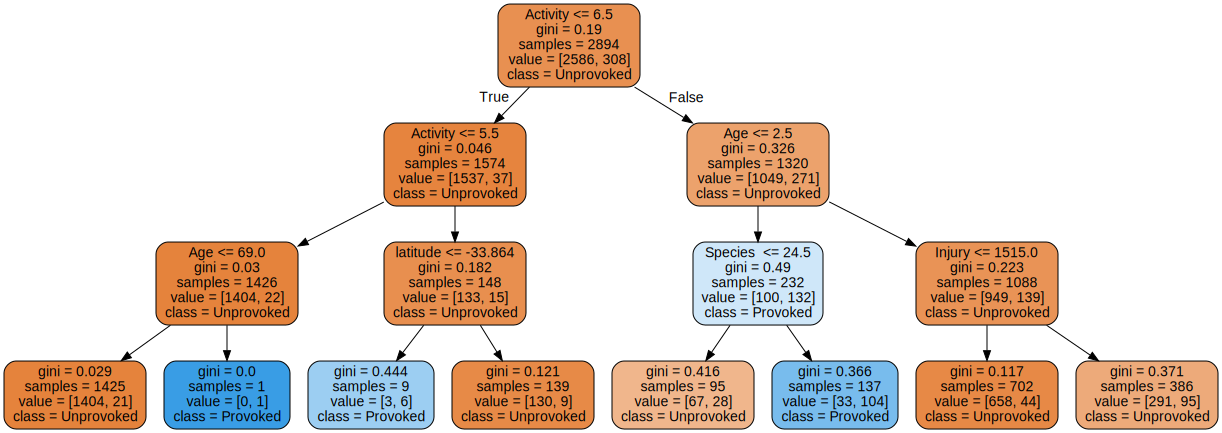

In [147]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="shark_attack_tree.dot",
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file("shark_attack_tree.dot")
#Following command must be ran in a command prompt inside SharkAttackAnalysis folder & converts .dot to .png
#dot -Tpng shark_attack_tree.dot -o shark_attack_tree.png

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  1.0
Avg provoked precision:  0.10653753026634401


In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = 20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


Avg unprovoked precision:  0.9033645148468521
Avg provoked precision:  0.5913403706970107


In [65]:
from sklearn.neural_network import MLPClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    clf = MLPClassifier(random_state=42, solver='lbfgs', max_iter=200)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

e:\codingprojects\sharkattackanalysis\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\codingprojects\sharkattackanalysis\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\codingprojects\sharkattackanalysis\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs

Avg unprovoked precision:  0.9182171028491384
Avg provoked precision:  0.3515728415293932


e:\codingprojects\sharkattackanalysis\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [117]:
from sklearn.ensemble import RandomForestClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 7
num_tests = 75

data = { 'n_estimators': [0], 'Avg provoked precision': [0], 'Avg unprovoked precision': [0]}
results_df = pd.DataFrame(data, index=[0])

for i in range(1, num_tests):
    total_precision_un = 0
    total_precision_p = 0
    num_est = 10 * i
    for j in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        clf = RandomForestClassifier(n_estimators = num_est, max_depth=6, n_jobs=-1, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
        total_precision_un += result_metrics["Unprovoked"]["precision"]
        total_precision_p += result_metrics["Provoked"]["precision"]

    new_data = {'n_estimators': num_est, 'Avg provoked precision': (total_precision_p / num_times), 'Avg unprovoked precision': (total_precision_un / num_times)}
    new_df = pd.DataFrame(new_data, index=[i])
    results_df.loc[i] = new_data
    results_df.append(new_df)

    #print("Avg unprovoked precision: ", total_precision_un / num_times)
    #print("Avg provoked precision: ", total_precision_p / num_times)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [149]:
print(results_df["Avg provoked precision"])

1     0.683006
2     0.784926
3     0.805961
4     0.800797
5     0.833829
        ...   
70    0.838300
71    0.861534
72    0.807696
73    0.857022
74    0.817416
Name: Avg provoked precision, Length: 74, dtype: float64


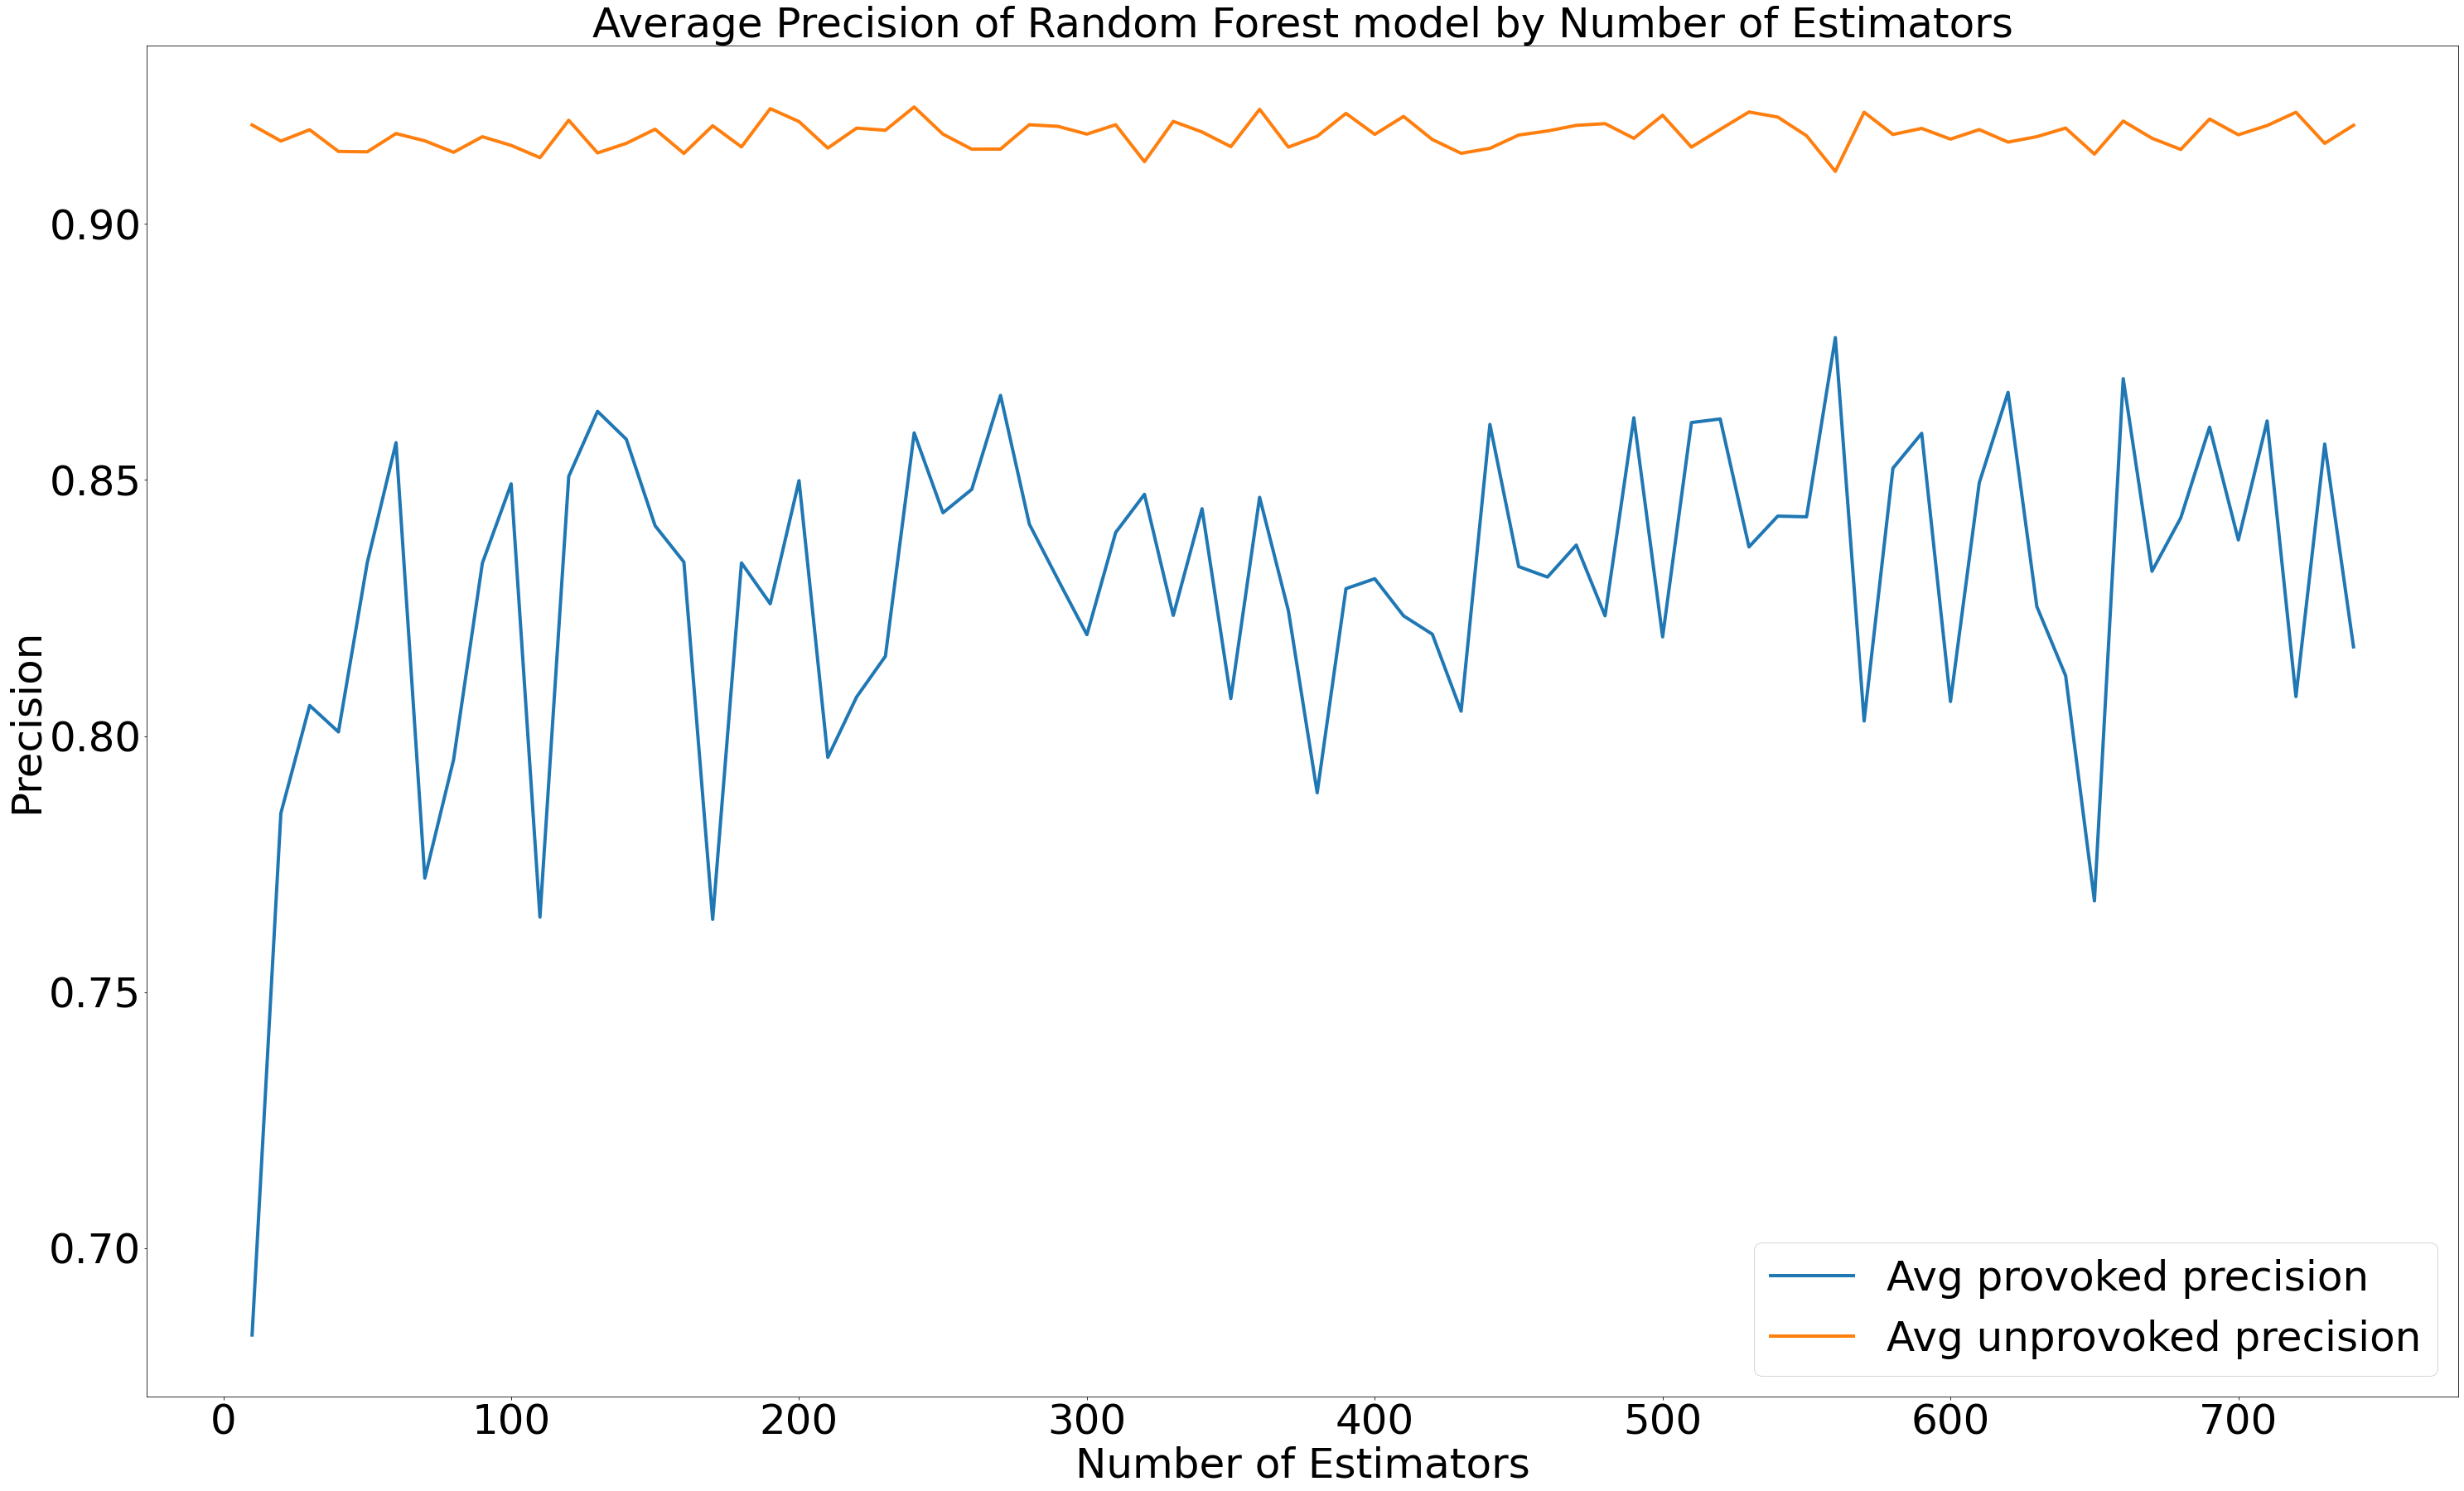

In [142]:
results_df.plot(x="n_estimators", y=["Avg provoked precision","Avg unprovoked precision"], kind="line", figsize=(50, 30), lw=4)
plt.legend(loc=4, prop={'size': 50})
plt.tick_params(axis='both', labelsize=50)
plt.xlabel("Number of Estimators", size=50)
plt.ylabel("Precision", size=50)
plt.title('Average Precision of Random Forest model by Number of Estimators', size=50)
plt.savefig("Avg_precision_rfm_by_num_estimators.png")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 7
num_tests = 75

data = { 'n_estimators': [0], 'Avg provoked precision': [0], 'Avg unprovoked precision': [0]}
results_df = pd.DataFrame(data, index=[0])

for i in range(1, num_tests):
    total_precision_un = 0
    total_precision_p = 0
    num_est = 10 * i
    for j in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        clf = RandomForestClassifier(n_estimators = num_est, max_depth=6, n_jobs=-1, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
        total_precision_un += result_metrics["Unprovoked"]["precision"]
        total_precision_p += result_metrics["Provoked"]["precision"]

    new_data = {'n_estimators': num_est, 'Avg provoked precision': (total_precision_p / num_times), 'Avg unprovoked precision': (total_precision_un / num_times)}
    new_df = pd.DataFrame(new_data, index=[i])
    results_df.loc[i] = new_data
    results_df.append(new_df)

    #print("Avg unprovoked precision: ", total_precision_un / num_times)
    #print("Avg provoked precision: ", total_precision_p / num_times)
    print(i)